In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split 
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir("C:/Users/shobh/Downloads")

In [3]:
df = pd.read_csv("onlinefraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,10039.64,C1231006920,170140.0,235296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19390.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,290.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,290.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [6]:
df.describe(include="all")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1048575,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06
unique,NaN,5,NaN,1048314,NaN,NaN,449635,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1215289648,NaN,NaN,C985934102,NaN,NaN,NaN
freq,NaN,373641,NaN,2,NaN,NaN,98,NaN,NaN,NaN
mean,2.696617e+01,NaN,2.155673e+05,NaN,8.740847e+05,8.950874e+05,NaN,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,NaN,1.035837e+06,NaN,2.972030e+06,3.015016e+06,NaN,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,NaN,1.000000e-01,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,NaN,1.244322e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,NaN,8.044852e+04,NaN,1.600200e+04,0.000000e+00,NaN,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,NaN,2.246821e+05,NaN,1.376130e+05,1.756173e+05,NaN,9.159235e+05,1.149808e+06,0.000000e+00


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

## Exploratory Data Analysis

In [7]:
class_counts = df['isFraud'].value_counts()

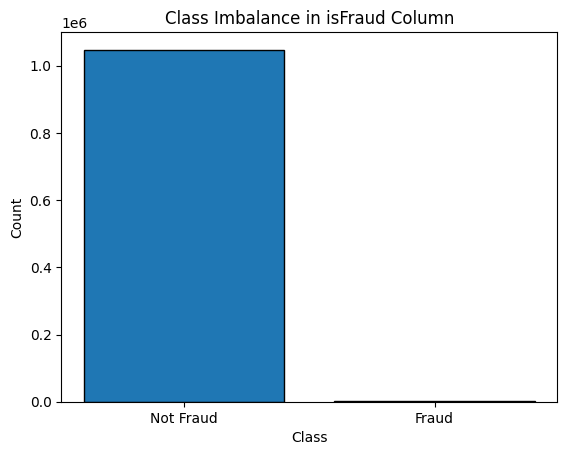

In [8]:
plt.bar(class_counts.index, class_counts.values, color=['tab:blue', 'tab:red'], edgecolor='black')
plt.title("Class Imbalance in isFraud Column")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

### Class imbalance ratio is 917:1

In [9]:
type_count = df.type.value_counts()

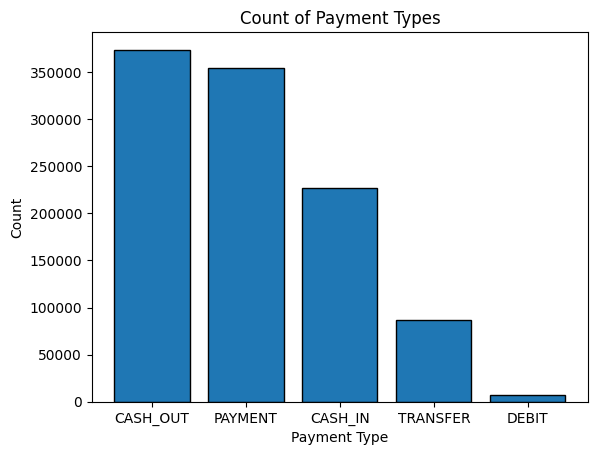

In [10]:
plt.bar(type_count.index,type_count.values,color="tab:blue",edgecolor="black")
plt.title("Count of Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.show()

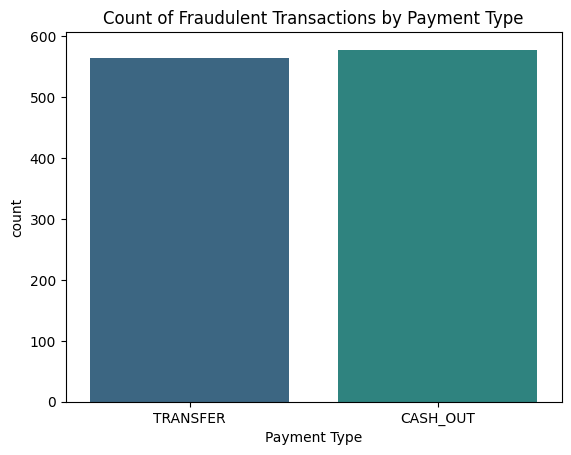

In [11]:
sns.countplot(x=df["type"][df["isFraud"]==1],hue=df["type"],palette="viridis")
plt.legend().remove()
plt.title("Count of Fraudulent Transactions by Payment Type")
plt.xlabel("Payment Type")
plt.show()

### From the countplot above we can observe that fraudulent transaction are limited to transfer and cash out

In [12]:
cust_by_amount = df[['nameOrig','amount']].sort_values(by="amount",ascending=False).head(10)
cust_by_amount

,nameOrig,amount
86278,C1999408852,290006100.1
131333,C708309959,261009101.0
49826,C728718059,253100100.1
49825,C394488466,253100100.1
1043010,C261519577,241003100.4
101565,C1839510618,210086100.5
543037,C719962139,200100101.0
145729,C382552669,186100100.2
514455,C888689249,171001100.7
407437,C1598165426,150100100.1


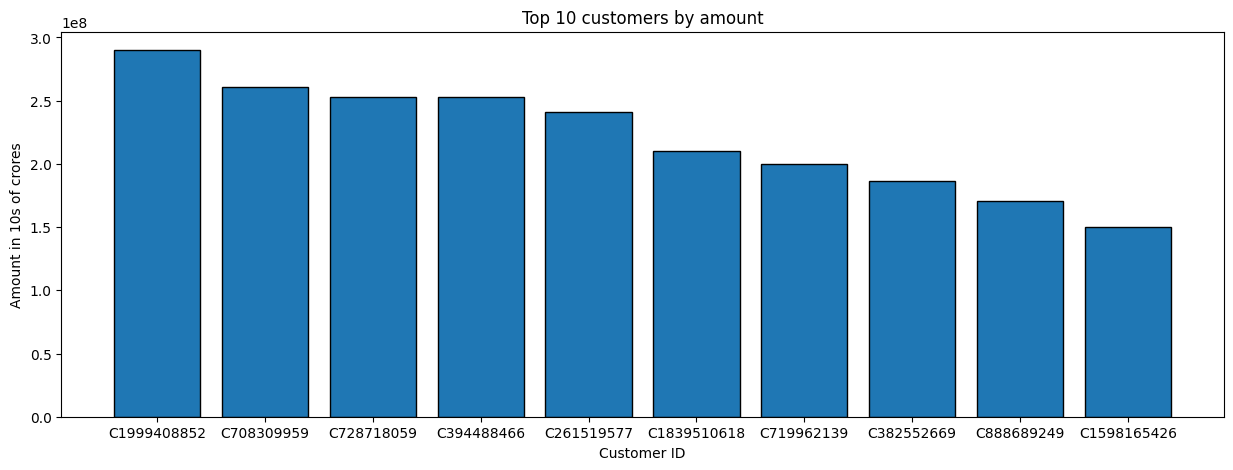

In [13]:
plt.figure(figsize=(15,5))
plt.bar(cust_by_amount["nameOrig"],cust_by_amount["amount"],color = "tab:blue",edgecolor="black")
plt.title("Top 10 customers by amount")
plt.xlabel("Customer ID")
plt.ylabel("Amount in 10s of crores")
plt.show()

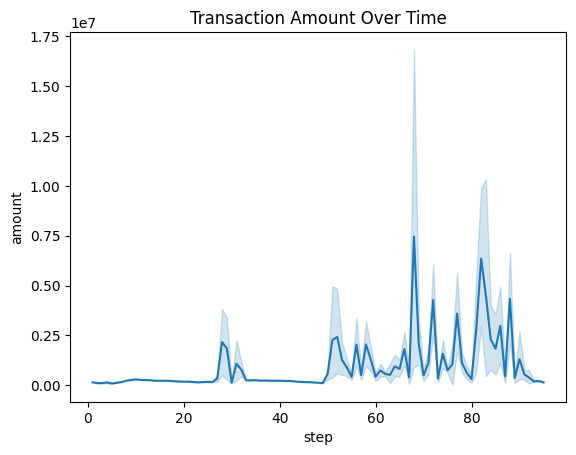

In [14]:
sns.lineplot(x='step', y='amount', data=df)
plt.title('Transaction Amount Over Time')
plt.show()

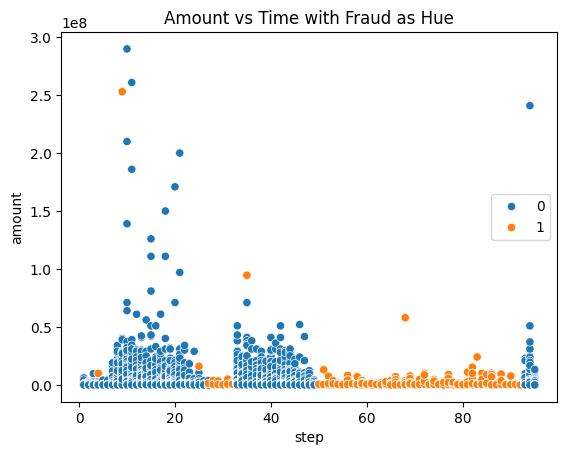

In [15]:
sns.scatterplot(data = df,x="step",y="amount",hue="isFraud")
plt.legend(loc="center right")
plt.title("Amount vs Time with Fraud as Hue")
plt.show()

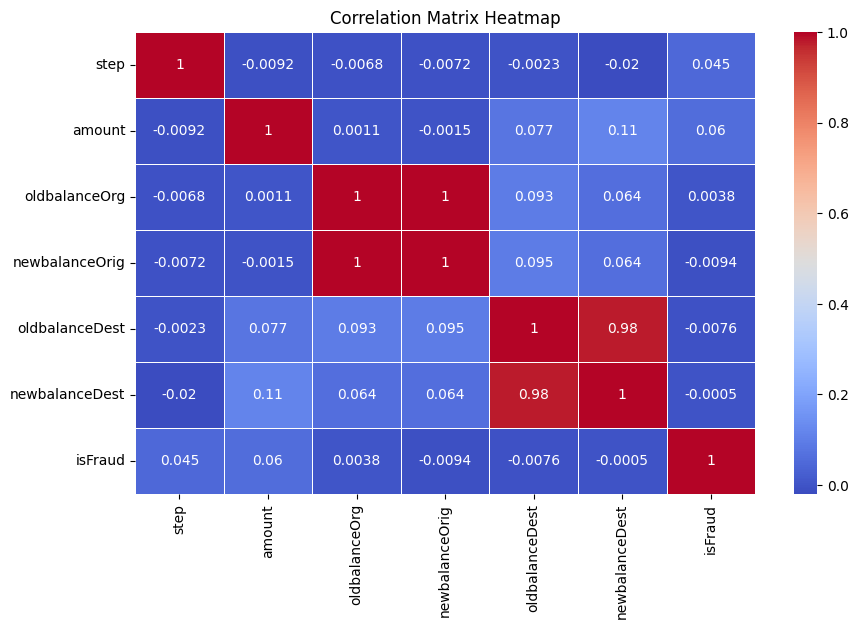

In [16]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<Axes: ylabel='amount'>

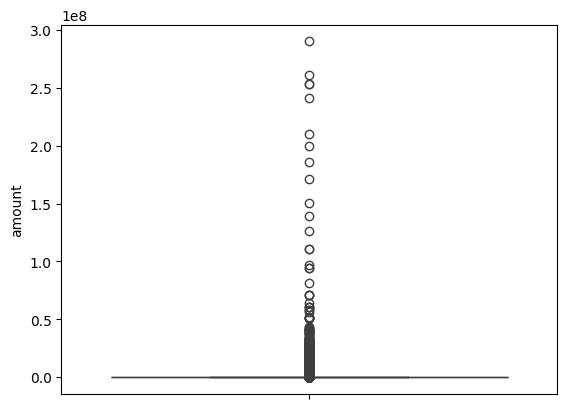

In [4]:
sns.boxplot(df["amount"])

## Managing Outliers

In [ ]:
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    mask = ~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)
    
    return df[mask]

In [ ]:
columns_to_check = ['amount', 'oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
df_2 = remove_outliers(df, columns_to_check)

In [ ]:
df.isFraud.value_counts()

In [ ]:
df_2.isFraud.value_counts()

### Since 46% of the fraudulent transactions are being removed while removing outliers, we will continue building the model without managing outliers

## One Hot Encoding

In [ ]:
df = pd.get_dummies(df,columns = ["type"], prefix = "type", drop_first = True)

In [ ]:
bool_columns = ["type_CASH_OUT","type_PAYMENT","type_DEBIT","type_TRANSFER"]

In [ ]:
df[bool_columns] = df[bool_columns].astype(int)

## Data Splitting

In [ ]:
X = df.drop(columns=["nameOrig","nameDest","isFraud"])
y = df["isFraud"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

## Using Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)

In [ ]:
dt_model.fit(X_train,y_train)

In [ ]:
y_pred_train_dt = dt_model.predict(X_train)
y_pred_dt = dt_model.predict(X_test)

print(f1_score(y_train,y_pred_train_dt))
print(f1_score(y_test,y_pred_dt))

### Tuning Hyperparameters of Decision Tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
depth = dt_model.get_depth()
depth

In [ ]:
param_grid = {'max_depth':range(31,0,-3),'min_samples_leaf': range(1,20,3)}

random_search_cv = RandomizedSearchCV(estimator=dt_model, param_distributions=param_grid, n_iter=30, cv=5, scoring='f1',n_jobs=-1)

In [ ]:
random_search_cv.fit(X_train,y_train)

In [ ]:
random_search_cv.best_params_

In [ ]:
dt_model_tuned = DecisionTreeClassifier(max_depth=16,min_samples_leaf=4,random_state=42)

In [ ]:
dt_model_tuned.fit(X_train,y_train)

In [ ]:
y_pred_train_dt_tuned = dt_model_tuned.predict(X_train)
y_pred_dt_tuned = dt_model_tuned.predict(X_test)

print(f1_score(y_train,y_pred_train_dt_tuned))
print(f1_score(y_test,y_pred_dt_tuned))

## Using Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf_classifier = RandomForestClassifier(random_state = 42)

In [47]:
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [48]:
y_pred_train_rf = rf_classifier.predict(X_train)
y_pred_rf = rf_classifier.predict(X_test)

print(f1_score(y_train,y_pred_train_rf))
print(f1_score(y_test,y_pred_rf))

1.0
0.8641571194762684


### Tuning Random forest

In [29]:
param_distributions = {"max_depth":range(20,0,-3),"n_estimators":[50,100,200]}
random_search_cv_rf = RandomizedSearchCV(estimator=rf_classifier,param_distributions=param_distributions, n_iter=10, cv=5, scoring='f1',n_jobs=-1)

In [30]:
random_search_cv_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(20, 0, -3),
                                        'n_estimators': [50, 100, 200]},
                   scoring='f1')

In [31]:
random_search_cv_rf.best_params_

{'n_estimators': 50, 'max_depth': 17}

In [49]:
rf_tuned = RandomForestClassifier(max_depth=16,n_estimators=50,random_state=42)

In [50]:
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=16, n_estimators=50, random_state=42)

In [51]:
y_pred_train_rf_tuned = rf_tuned.predict(X_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)

print(f1_score(y_train,y_pred_train_rf_tuned))
print(f1_score(y_test,y_pred_rf_tuned))

0.9367930805056554
0.8660130718954249


## Using XGBoost Classifier

In [13]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [73]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic",n_estimators=100,max_depth=3,scale_pos_weight=5,random_state=42)

In [74]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [75]:
xgb_predict = xgb_model.predict(X_test)
xgb_predict_train = xgb_model.predict(X_train)
xgb_predict_df = pd.DataFrame(xgb_predict)
xgb_predict_df.value_counts()

0
0    314268
1       305
Name: count, dtype: int64

In [17]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score

In [76]:
print(f1_score(y_train,xgb_predict_train))
print(f1_score(y_test,xgb_predict))
print(classification_report(y_test,xgb_predict))

0.929903536977492
0.904320987654321
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314230
           1       0.96      0.85      0.90       343

    accuracy                           1.00    314573
   macro avg       0.98      0.93      0.95    314573
weighted avg       1.00      1.00      1.00    314573



## Cross Validation

In [30]:
params = {"objective":"binary:logistic","max_depth":3,"scale_pos_weight":5}
cv_results = xgb.cv(dtrain=dtrain, params = params, nfold=4,num_boost_round=10,metrics="auc",as_pandas = True)

print(cv_results)
print((cv_results["test-auc-mean"]).iloc[-1])

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.868252       0.013474       0.865486      0.026523
1        0.895871       0.010644       0.891831      0.024778
2        0.907960       0.004895       0.904607      0.013583
3        0.911010       0.002075       0.911382      0.010792
4        0.911177       0.002433       0.911491      0.010456
5        0.912722       0.001539       0.912807      0.012617
6        0.947909       0.018691       0.946255      0.026362
7        0.953883       0.014944       0.949733      0.024435
8        0.981091       0.002060       0.978735      0.006780
9        0.982375       0.002261       0.979848      0.006923
0.9798482475954159


## Oversampling Using SMOTE

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
smote = SMOTE(random_state=42)

In [83]:
X_train_smt, y_train_smt = smote.fit_resample(X_train,y_train)

In [91]:
xgb_model_smote.fit(X_train_smt,y_train_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [94]:
xgb_predict = xgb_model.predict(X_test)
xgb_predict_train_smt = xgb_model.predict(X_train_smt)

In [95]:
print(f1_score(y_train_smt,xgb_predict_train_smt))
print(f1_score(y_test,xgb_predict))
print(classification_report(y_test,xgb_predict))

0.9317260475148771
0.904320987654321
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314230
           1       0.96      0.85      0.90       343

    accuracy                           1.00    314573
   macro avg       0.98      0.93      0.95    314573
weighted avg       1.00      1.00      1.00    314573

